In [45]:
RKP = "DL031"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [46]:
metro_data = pd.read_csv('./data/rkpuram.csv',delimiter=';',skiprows=24)
aqi_data = pd.read_csv('./data/station_hour.csv')

/home/euler/miniconda3/envs/air/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
def nullAqi(datafram):
    return str(datafram.isnull()['AQI'].sum()).zfill(5) + "/" + str(len(datafram)).zfill(5)
stations = ["DL"+str(x).zfill(3) for x in range(1,39)]
split_aqi = []
for i in range(len(stations)):
    split_aqi.append(aqi_data[aqi_data['StationId'] == stations[i]])
    a_1 = split_aqi[i][split_aqi[i]['Datetime'].str[0:4]=="2015"]
    a_2 = split_aqi[i][split_aqi[i]['Datetime'].str[0:4]=="2016"]
    a_3 = split_aqi[i][split_aqi[i]['Datetime'].str[0:4]=="2017"]
    a_4 = split_aqi[i][split_aqi[i]['Datetime'].str[0:4]=="2018"]
    a_5 = split_aqi[i][split_aqi[i]['Datetime'].str[0:4]=="2019"]
    print("ST:",stations[i],nullAqi(a_1),nullAqi(a_2),nullAqi(a_3),nullAqi(a_4),nullAqi(a_5))
# aqi_ito = split_aqi[13]
# print(aqi_ito)

ST: DL001 00000/00000 00000/00000 00000/00000 00015/01209 00365/08760
ST: DL002 01076/06517 01866/08784 03882/08760 01750/08760 00318/08760
ST: DL003 00000/00000 00000/00000 00000/00000 00158/08007 00060/08760
ST: DL004 00000/00000 00000/00000 01126/02772 00439/08760 00273/08760
ST: DL005 00000/00000 00000/00000 00000/00000 00015/04325 00097/08760
ST: DL006 00000/00000 00000/00000 00399/02951 03087/08760 00686/08760
ST: DL007 03742/08759 08761/08784 07307/08760 00390/08760 00141/08760
ST: DL008 08759/08759 08784/08784 08026/08760 00726/08760 00420/08760
ST: DL009 00000/00000 00000/00000 00000/00000 00236/08007 00162/08760
ST: DL010 00000/00000 00000/00000 00000/00000 00132/08008 00047/08760
ST: DL011 00000/00000 06587/06587 08760/08760 08760/08760 08760/08760
ST: DL012 00000/00000 00000/00000 00796/02951 00159/08760 00950/08760
ST: DL013 04643/08759 06564/08784 07308/08760 00556/08760 00295/08760
ST: DL014 08695/08695 08784/08784 07664/08760 01479/08760 00298/08760
ST: DL015 00000/0000

In [48]:
rk_aqi = split_aqi[30]
# print(rk_aqi[:1])
print(metro_data.columns)
metro_data.rename(columns={'# Date': 'Date',}, inplace=True)
metro_data.rename(columns={'UT time': 'Time',}, inplace=True)
print(metro_data.columns)

Index(['# Date', 'UT time', 'Temperature', 'Relative Humidity', 'Pressure',
       'Wind speed', 'Wind direction', 'Rainfall', 'Snowfall', 'Snow depth',
       'Short-wave irradiation'],
      dtype='object')
Index(['Date', 'Time', 'Temperature', 'Relative Humidity', 'Pressure',
       'Wind speed', 'Wind direction', 'Rainfall', 'Snowfall', 'Snow depth',
       'Short-wave irradiation'],
      dtype='object')


In [49]:
print(rk_aqi.columns)
rk_aqi['Time'] = rk_aqi['Datetime'].str[-8:-3]
rk_aqi['Date'] = rk_aqi['Datetime'].str[0:10]
# rk_aqi.drop(columns =["Datetime"], inplace = True) 
print(rk_aqi[:5])

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
        StationId             Datetime  PM2.5   PM10    NO    NO2    NOx  \
1000314     DL031  2015-04-04 11:00:00  59.67  39.17  5.83  41.58  46.47   
1000315     DL031  2015-04-04 12:00:00  37.67  43.00  7.24  36.19  43.51   
1000316     DL031  2015-04-04 13:00:00  36.00  58.00  5.54  26.33  32.07   
1000317     DL031  2015-04-04 14:00:00    NaN  48.00  7.12  22.67  30.88   
1000318     DL031  2015-04-04 15:00:00  32.00  50.33  7.02  19.72  28.03   

           NH3    CO    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  \
1000314  41.97  0.33  13.53  79.50     1.61     7.09     NaN  NaN        NaN   
1000315  38.40  0.32  17.91  65.00     1.87     6.91     NaN  NaN        NaN   
1000316  26.73  0.42   6.30  58.17     1.36     6.26     NaN  NaN        NaN   
1000317  20.23  0.40    NaN  54.42     0.97  

<ipython-input-49-91803d7b94b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rk_aqi['Time'] = rk_aqi['Datetime'].str[-8:-3]
<ipython-input-49-91803d7b94b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rk_aqi['Date'] = rk_aqi['Datetime'].str[0:10]


In [50]:
print(len(rk_aqi))
print(len(metro_data))
df = pd.merge(rk_aqi, metro_data, how='inner', on=['Date', 'Time'])
print(len(df))
df[:10]

45950
49680
44035


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Time,Date,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,DL031,2015-04-04 11:00:00,59.67,39.17,5.83,41.58,46.47,41.97,0.33,13.53,79.50,1.61,7.09,NaN,NaN,NaN,11:00,2015-04-04,297.29,57.32,978.37,2.60,309.10,0.151247,0.0,0.0,353.7906
1,DL031,2015-04-04 12:00:00,37.67,43.00,7.24,36.19,43.51,38.40,0.32,17.91,65.00,1.87,6.91,NaN,NaN,NaN,12:00,2015-04-04,296.40,60.84,978.82,2.58,312.52,0.025755,0.0,0.0,190.6669
2,DL031,2015-04-04 13:00:00,36.00,58.00,5.54,26.33,32.07,26.73,0.42,6.30,58.17,1.36,6.26,NaN,NaN,NaN,13:00,2015-04-04,295.20,67.15,979.46,1.98,318.76,0.005438,0.0,0.0,57.3451
3,DL031,2015-04-04 14:00:00,NaN,48.00,7.12,22.67,30.88,20.23,0.40,NaN,54.42,0.97,4.21,NaN,NaN,NaN,14:00,2015-04-04,293.47,76.32,980.21,1.26,330.37,0.001642,0.0,0.0,0.0996
4,DL031,2015-04-04 15:00:00,32.00,50.33,7.02,19.72,28.03,18.80,0.45,NaN,49.92,1.30,4.83,NaN,NaN,NaN,15:00,2015-04-04,292.85,76.57,981.02,0.87,339.83,0.000546,0.0,0.0,0.0000
5,DL031,2015-04-04 16:00:00,32.17,62.33,7.01,25.05,32.95,18.07,0.50,NaN,49.67,1.97,7.23,NaN,NaN,NaN,16:00,2015-04-04,292.37,76.99,981.54,0.43,349.98,0.000223,0.0,0.0,0.0000
6,DL031,2015-04-04 17:00:00,35.33,66.17,7.93,32.71,41.26,25.17,0.53,7.82,48.08,1.71,8.11,NaN,NaN,NaN,17:00,2015-04-04,291.88,77.91,981.64,0.18,346.06,0.000107,0.0,0.0,0.0000
7,DL031,2015-04-04 18:00:00,54.83,68.33,5.08,35.26,38.95,36.15,0.49,15.35,50.92,2.43,10.88,NaN,NaN,NaN,18:00,2015-04-04,291.38,79.41,981.50,0.11,286.51,0.000048,0.0,0.0,0.0000
8,DL031,2015-04-04 19:00:00,79.17,31.00,1.95,71.90,73.00,27.28,33.80,180.80,57.92,2.67,10.67,NaN,NaN,NaN,19:00,2015-04-04,290.90,81.04,981.33,0.15,275.41,0.000022,0.0,0.0,0.0000
9,DL031,2015-04-04 20:00:00,11.83,72.00,8.75,86.51,92.01,20.85,23.06,10.79,64.42,4.10,13.74,NaN,NaN,NaN,20:00,2015-04-04,290.39,83.16,981.11,0.16,297.11,0.000010,0.0,0.0,0.0000


In [51]:
pd.set_option('display.max_columns', None)
# print(df[:5])
df['Year'] = df['Date'].str[0:4]
df['Month'] = df['Date'].str[5:7].astype(np.float64)
df['Day'] = df['Date'].str[8:10].astype(np.float64)
df['Hour'] = df['Time'].str[0:2]
print(df[:5])

  StationId             Datetime  PM2.5   PM10    NO    NO2    NOx    NH3  \
0     DL031  2015-04-04 11:00:00  59.67  39.17  5.83  41.58  46.47  41.97   
1     DL031  2015-04-04 12:00:00  37.67  43.00  7.24  36.19  43.51  38.40   
2     DL031  2015-04-04 13:00:00  36.00  58.00  5.54  26.33  32.07  26.73   
3     DL031  2015-04-04 14:00:00    NaN  48.00  7.12  22.67  30.88  20.23   
4     DL031  2015-04-04 15:00:00  32.00  50.33  7.02  19.72  28.03  18.80   

     CO    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket   Time  \
0  0.33  13.53  79.50     1.61     7.09     NaN  NaN        NaN  11:00   
1  0.32  17.91  65.00     1.87     6.91     NaN  NaN        NaN  12:00   
2  0.42   6.30  58.17     1.36     6.26     NaN  NaN        NaN  13:00   
3  0.40    NaN  54.42     0.97     4.21     NaN  NaN        NaN  14:00   
4  0.45    NaN  49.92     1.30     4.83     NaN  NaN        NaN  15:00   

         Date  Temperature  Relative Humidity  Pressure  Wind speed  \
0  2015-04-04       2

In [52]:
# Rolling window then shift one up
rlist=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']
for i in rlist:
    df[i+'_mean'] = df[i].rolling(window=2, min_periods=2).mean().shift(1)
    df[i+'_min'] = df[i].rolling(window=3, min_periods=2).min().shift(1)
    df[i+'_max'] = df[i].rolling(window=3, min_periods=2).max().shift(1)
df[:5]

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Time,Date,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation,Year,Month,Day,Hour,PM2.5_mean,PM2.5_min,PM2.5_max,PM10_mean,PM10_min,PM10_max,NO_mean,NO_min,NO_max,NO2_mean,NO2_min,NO2_max,NOx_mean,NOx_min,NOx_max,NH3_mean,NH3_min,NH3_max,CO_mean,CO_min,CO_max,SO2_mean,SO2_min,SO2_max,O3_mean,O3_min,O3_max
0,DL031,2015-04-04 11:00:00,59.67,39.17,5.83,41.58,46.47,41.97,0.33,13.53,79.50,1.61,7.09,NaN,NaN,NaN,11:00,2015-04-04,297.29,57.32,978.37,2.60,309.10,0.151247,0.0,0.0,353.7906,2015,4.0,4.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DL031,2015-04-04 12:00:00,37.67,43.00,7.24,36.19,43.51,38.40,0.32,17.91,65.00,1.87,6.91,NaN,NaN,NaN,12:00,2015-04-04,296.40,60.84,978.82,2.58,312.52,0.025755,0.0,0.0,190.6669,2015,4.0,4.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DL031,2015-04-04 13:00:00,36.00,58.00,5.54,26.33,32.07,26.73,0.42,6.30,58.17,1.36,6.26,NaN,NaN,NaN,13:00,2015-04-04,295.20,67.15,979.46,1.98,318.76,0.005438,0.0,0.0,57.3451,2015,4.0,4.0,13,48.670,37.67,59.67,41.085,39.17,43.0,6.535,5.83,7.24,38.885,36.19,41.58,44.990,43.51,46.47,40.185,38.40,41.97,0.325,0.32,0.33,15.720,13.53,17.91,72.250,65.00,79.5
3,DL031,2015-04-04 14:00:00,NaN,48.00,7.12,22.67,30.88,20.23,0.40,NaN,54.42,0.97,4.21,NaN,NaN,NaN,14:00,2015-04-04,293.47,76.32,980.21,1.26,330.37,0.001642,0.0,0.0,0.0996,2015,4.0,4.0,14,36.835,36.00,59.67,50.500,39.17,58.0,6.390,5.54,7.24,31.260,26.33,41.58,37.790,32.07,46.47,32.565,26.73,41.97,0.370,0.32,0.42,12.105,6.30,17.91,61.585,58.17,79.5
4,DL031,2015-04-04 15:00:00,32.00,50.33,7.02,19.72,28.03,18.80,0.45,NaN,49.92,1.30,4.83,NaN,NaN,NaN,15:00,2015-04-04,292.85,76.57,981.02,0.87,339.83,0.000546,0.0,0.0,0.0000,2015,4.0,4.0,15,NaN,36.00,37.67,53.000,43.00,58.0,6.330,5.54,7.24,24.500,22.67,36.19,31.475,30.88,43.51,23.480,20.23,38.40,0.410,0.32,0.42,NaN,6.30,17.91,56.295,54.42,65.0


In [53]:
# Wind Speed and Month, Hour tranformations
print(df.columns)
df['windX'] = np.cos(np.deg2rad(df['Wind direction'])) * df['Wind speed']
df['windY'] = np.sin(np.deg2rad(df['Wind direction'])) * df['Wind speed']
df['hourX'] = np.cos((df['Hour'].astype(np.float64)-1)*np.pi/24)
df['hourY'] = np.sin((df['Hour'].astype(np.float64)-1)*np.pi/24)
df['MonthX'] = np.cos((df['Month'].astype(np.float64)-1)*np.pi/12)
df['MonthY'] = np.sin((df['Month'].astype(np.float64)-1)*np.pi/12)
df[:5]

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'Time', 'Date', 'Temperature', 'Relative Humidity', 'Pressure',
       'Wind speed', 'Wind direction', 'Rainfall', 'Snowfall', 'Snow depth',
       'Short-wave irradiation', 'Year', 'Month', 'Day', 'Hour', 'PM2.5_mean',
       'PM2.5_min', 'PM2.5_max', 'PM10_mean', 'PM10_min', 'PM10_max',
       'NO_mean', 'NO_min', 'NO_max', 'NO2_mean', 'NO2_min', 'NO2_max',
       'NOx_mean', 'NOx_min', 'NOx_max', 'NH3_mean', 'NH3_min', 'NH3_max',
       'CO_mean', 'CO_min', 'CO_max', 'SO2_mean', 'SO2_min', 'SO2_max',
       'O3_mean', 'O3_min', 'O3_max'],
      dtype='object')


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Time,Date,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation,Year,Month,Day,Hour,PM2.5_mean,PM2.5_min,PM2.5_max,PM10_mean,PM10_min,PM10_max,NO_mean,NO_min,NO_max,NO2_mean,NO2_min,NO2_max,NOx_mean,NOx_min,NOx_max,NH3_mean,NH3_min,NH3_max,CO_mean,CO_min,CO_max,SO2_mean,SO2_min,SO2_max,O3_mean,O3_min,O3_max,windX,windY,hourX,hourY,MonthX,MonthY
0,DL031,2015-04-04 11:00:00,59.67,39.17,5.83,41.58,46.47,41.97,0.33,13.53,79.50,1.61,7.09,NaN,NaN,NaN,11:00,2015-04-04,297.29,57.32,978.37,2.60,309.10,0.151247,0.0,0.0,353.7906,2015,4.0,4.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.639757,-2.017721,2.588190e-01,0.965926,0.707107,0.707107
1,DL031,2015-04-04 12:00:00,37.67,43.00,7.24,36.19,43.51,38.40,0.32,17.91,65.00,1.87,6.91,NaN,NaN,NaN,12:00,2015-04-04,296.40,60.84,978.82,2.58,312.52,0.025755,0.0,0.0,190.6669,2015,4.0,4.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.743687,-1.901567,1.305262e-01,0.991445,0.707107,0.707107
2,DL031,2015-04-04 13:00:00,36.00,58.00,5.54,26.33,32.07,26.73,0.42,6.30,58.17,1.36,6.26,NaN,NaN,NaN,13:00,2015-04-04,295.20,67.15,979.46,1.98,318.76,0.005438,0.0,0.0,57.3451,2015,4.0,4.0,13,48.670,37.67,59.67,41.085,39.17,43.0,6.535,5.83,7.24,38.885,36.19,41.58,44.990,43.51,46.47,40.185,38.40,41.97,0.325,0.32,0.33,15.720,13.53,17.91,72.250,65.00,79.5,1.488871,-1.305245,6.123234e-17,1.000000,0.707107,0.707107
3,DL031,2015-04-04 14:00:00,NaN,48.00,7.12,22.67,30.88,20.23,0.40,NaN,54.42,0.97,4.21,NaN,NaN,NaN,14:00,2015-04-04,293.47,76.32,980.21,1.26,330.37,0.001642,0.0,0.0,0.0996,2015,4.0,4.0,14,36.835,36.00,59.67,50.500,39.17,58.0,6.390,5.54,7.24,31.260,26.33,41.58,37.790,32.07,46.47,32.565,26.73,41.97,0.370,0.32,0.42,12.105,6.30,17.91,61.585,58.17,79.5,1.095238,-0.622940,-1.305262e-01,0.991445,0.707107,0.707107
4,DL031,2015-04-04 15:00:00,32.00,50.33,7.02,19.72,28.03,18.80,0.45,NaN,49.92,1.30,4.83,NaN,NaN,NaN,15:00,2015-04-04,292.85,76.57,981.02,0.87,339.83,0.000546,0.0,0.0,0.0000,2015,4.0,4.0,15,NaN,36.00,37.67,53.000,43.00,58.0,6.330,5.54,7.24,24.500,22.67,36.19,31.475,30.88,43.51,23.480,20.23,38.40,0.410,0.32,0.42,NaN,6.30,17.91,56.295,54.42,65.0,0.816646,-0.299982,-2.588190e-01,0.965926,0.707107,0.707107


In [54]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['isWeekend'] =  (df['Date'].dt.dayofweek>=5).astype(int)
df[:5]

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Time,Date,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation,Year,Month,Day,Hour,PM2.5_mean,PM2.5_min,PM2.5_max,PM10_mean,PM10_min,PM10_max,NO_mean,NO_min,NO_max,NO2_mean,NO2_min,NO2_max,NOx_mean,NOx_min,NOx_max,NH3_mean,NH3_min,NH3_max,CO_mean,CO_min,CO_max,SO2_mean,SO2_min,SO2_max,O3_mean,O3_min,O3_max,windX,windY,hourX,hourY,MonthX,MonthY,isWeekend
0,DL031,2015-04-04 11:00:00,59.67,39.17,5.83,41.58,46.47,41.97,0.33,13.53,79.50,1.61,7.09,NaN,NaN,NaN,11:00,2015-04-04,297.29,57.32,978.37,2.60,309.10,0.151247,0.0,0.0,353.7906,2015,4.0,4.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.639757,-2.017721,2.588190e-01,0.965926,0.707107,0.707107,1
1,DL031,2015-04-04 12:00:00,37.67,43.00,7.24,36.19,43.51,38.40,0.32,17.91,65.00,1.87,6.91,NaN,NaN,NaN,12:00,2015-04-04,296.40,60.84,978.82,2.58,312.52,0.025755,0.0,0.0,190.6669,2015,4.0,4.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.743687,-1.901567,1.305262e-01,0.991445,0.707107,0.707107,1
2,DL031,2015-04-04 13:00:00,36.00,58.00,5.54,26.33,32.07,26.73,0.42,6.30,58.17,1.36,6.26,NaN,NaN,NaN,13:00,2015-04-04,295.20,67.15,979.46,1.98,318.76,0.005438,0.0,0.0,57.3451,2015,4.0,4.0,13,48.670,37.67,59.67,41.085,39.17,43.0,6.535,5.83,7.24,38.885,36.19,41.58,44.990,43.51,46.47,40.185,38.40,41.97,0.325,0.32,0.33,15.720,13.53,17.91,72.250,65.00,79.5,1.488871,-1.305245,6.123234e-17,1.000000,0.707107,0.707107,1
3,DL031,2015-04-04 14:00:00,NaN,48.00,7.12,22.67,30.88,20.23,0.40,NaN,54.42,0.97,4.21,NaN,NaN,NaN,14:00,2015-04-04,293.47,76.32,980.21,1.26,330.37,0.001642,0.0,0.0,0.0996,2015,4.0,4.0,14,36.835,36.00,59.67,50.500,39.17,58.0,6.390,5.54,7.24,31.260,26.33,41.58,37.790,32.07,46.47,32.565,26.73,41.97,0.370,0.32,0.42,12.105,6.30,17.91,61.585,58.17,79.5,1.095238,-0.622940,-1.305262e-01,0.991445,0.707107,0.707107,1
4,DL031,2015-04-04 15:00:00,32.00,50.33,7.02,19.72,28.03,18.80,0.45,NaN,49.92,1.30,4.83,NaN,NaN,NaN,15:00,2015-04-04,292.85,76.57,981.02,0.87,339.83,0.000546,0.0,0.0,0.0000,2015,4.0,4.0,15,NaN,36.00,37.67,53.000,43.00,58.0,6.330,5.54,7.24,24.500,22.67,36.19,31.475,30.88,43.51,23.480,20.23,38.40,0.410,0.32,0.42,NaN,6.30,17.91,56.295,54.42,65.0,0.816646,-0.299982,-2.588190e-01,0.965926,0.707107,0.707107,1


In [55]:
attrplt = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Temperature','Relative Humidity','windX','windY','Rainfall','Pressure']
avg=df.mean(skipna=True)
mn = df.min(skipna=True)
mx = df.max(skipna=True)
std = df.std(skipna=True)
skew = df.skew(skipna=True)
kurtosis = df.kurtosis(skipna=True)
# data=[['Name','Mean','Min','Max','Std.','Skew','Kurtosis']]
data=[]
for  i in range(len(attrplt)):
    data.append([])
    data[i].append(attrplt[i])
    data[i].append(avg[attrplt[i]])
    data[i].append(mn[attrplt[i]])
    data[i].append(mx[attrplt[i]])
    data[i].append(std[attrplt[i]])
    data[i].append(skew[attrplt[i]])
    data[i].append(kurtosis[attrplt[i]])

<ipython-input-55-482769c36bbb>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg=df.mean(skipna=True)


In [56]:
stats=pd.DataFrame(data,columns=['Name','Mean','Min','Max','Std.','Skew','Kurtosis'])
corrdf = df[attrplt].copy()
corrdf = corrdf.corr()
stats

,Name,Mean,Min,Max,Std.,Skew,Kurtosis
0,PM2.5,119.402531,0.330000,985.000000,105.774223,2.300915,8.659444
1,PM10,237.391777,0.330000,998.170000,163.055948,1.314232,2.034356
2,NO,50.577551,0.010000,499.900000,93.682325,2.586054,6.452453
3,NO2,62.265805,0.100000,468.230000,42.938785,1.396569,3.178786
4,NOx,80.188937,0.000000,499.700000,97.207850,2.016122,3.957099
5,NH3,32.006870,0.100000,327.250000,18.737539,2.051288,9.006949
6,CO,1.651598,0.000000,49.500000,2.179861,7.949092,123.702590
7,SO2,20.017753,0.040000,198.150000,17.941181,2.387577,9.451538
8,O3,54.773178,0.400000,199.700000,21.880755,-0.174889,-0.664122
9,Temperature,299.323331,273.950000,321.160000,9.152926,-0.244692,-0.566431


<AxesSubplot:>

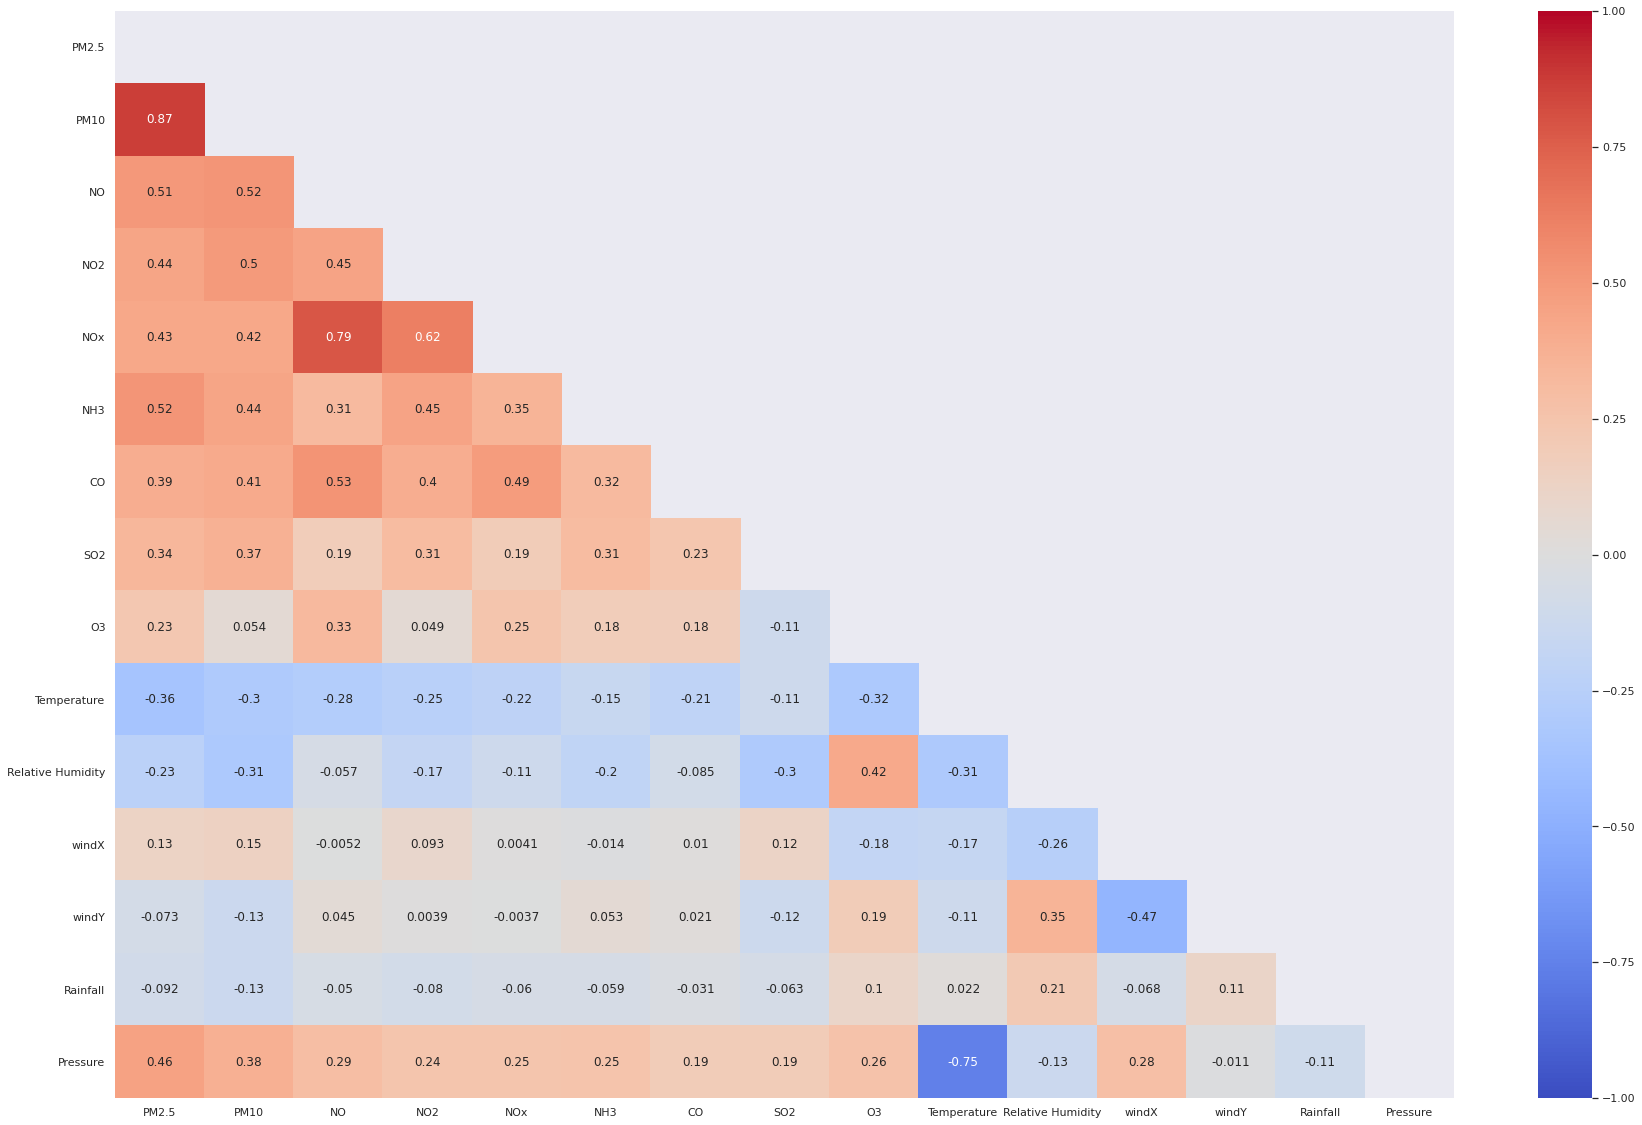

In [57]:
#graphs, correlation heatmap
plt.figure(figsize = (30,20))
matrix = np.triu(corrdf)
sns.heatmap(corrdf, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

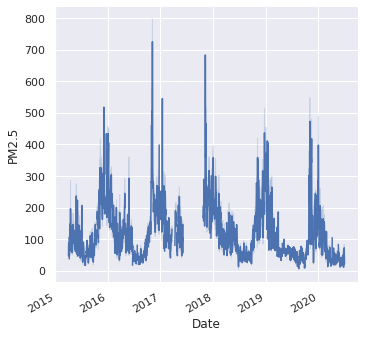

In [58]:
dateDF =  (df.groupby(['Date'], as_index=False)).mean()
g = sns.relplot(x="Date", y="PM2.5", kind="line", data=df)
g.fig.autofmt_xdate()

In [87]:
cop = df.copy()
cop.drop('Benzene', axis=1, inplace=True)
cop.drop('Toluene',axis=1, inplace=True)
cop.drop('Xylene', axis=1,inplace=True)
cop.drop('AQI_Bucket',axis=1,inplace=True)
cop.drop('Datetime',axis=1,inplace=True)
cop.drop('StationId',axis=1,inplace=True)
cop.drop('Time',axis=1,inplace=True)
cop.drop('Date',axis=1,inplace=True)
print(cop[:1])
# cop.drop('AQI_bucket',inpace=True)
cop.dropna(inplace=True)
X = cop[['PM2.5_mean','PM10_mean','NO_mean','NO2_mean','NOx_mean','NH3_mean','CO_mean','SO2_mean','O3_mean','Temperature','Relative Humidity','windX','windY','Rainfall','Pressure']]
y = cop['PM10']
from sklearn.feature_selection import SelectKBest, chi2, f_classif
bestfeatures = SelectKBest( k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

   PM2.5   PM10    NO    NO2    NOx    NH3    CO    SO2    O3  AQI  \
0  59.67  39.17  5.83  41.58  46.47  41.97  0.33  13.53  79.5  NaN   

   Temperature  Relative Humidity  Pressure  Wind speed  Wind direction  \
0       297.29              57.32    978.37         2.6           309.1   

   Rainfall  Snowfall  Snow depth  Short-wave irradiation  Year  Month  Day  \
0  0.151247       0.0         0.0                353.7906  2015    4.0  4.0   

  Hour  PM2.5_mean  PM2.5_min  PM2.5_max  PM10_mean  PM10_min  PM10_max  \
0   11         NaN        NaN        NaN        NaN       NaN       NaN   

   NO_mean  NO_min  NO_max  NO2_mean  NO2_min  NO2_max  NOx_mean  NOx_min  \
0      NaN     NaN     NaN       NaN      NaN      NaN       NaN      NaN   

   NOx_max  NH3_mean  NH3_min  NH3_max  CO_mean  CO_min  CO_max  SO2_mean  \
0      NaN       NaN      NaN      NaN      NaN     NaN     NaN       NaN   

   SO2_min  SO2_max  O3_mean  O3_min  O3_max     windX     windY     hourX  \
0      NaN